In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

folder = '../../data/orig_data/graph_results/'


In [4]:
df = pd.read_csv(folder+ 'res_sampling_data.csv', index_col=0).reset_index().sort_values(['index'])
print(df.columns)

df['name'] = ['_'.join(idx.split('_')[:-1]) for idx in df['index']]
df.head()


Index(['index', 'knn_2_ltcc_all', 'knn_2_ltcc_0', 'knn_2_ltcc_1',
       'knn_2_ltcc_2', 'knn_2_mcec', 'knn_2_cp_a', 'knn_2_ce_a',
       'knn_2_mv_a_true', 'knn_2_mv_a_false',
       ...
       'knn_6_mv_7_true', 'knn_6_mv_7_false', 'knn_6_cp_8', 'knn_6_ce_8',
       'knn_6_mv_8_true', 'knn_6_mv_8_false', 'knn_6_cp_9', 'knn_6_ce_9',
       'knn_6_mv_9_true', 'knn_6_mv_9_false'],
      dtype='object', length=169)


,index,knn_2_ltcc_all,knn_2_ltcc_0,knn_2_ltcc_1,knn_2_ltcc_2,knn_2_mcec,knn_2_cp_a,knn_2_ce_a,knn_2_mv_a_true,knn_2_mv_a_false,...,knn_6_mv_7_false,knn_6_cp_8,knn_6_ce_8,knn_6_mv_8_true,knn_6_mv_8_false,knn_6_cp_9,knn_6_ce_9,knn_6_mv_9_true,knn_6_mv_9_false,name
12697,JavierGeneratedData_3dinterleaved_3classes_X-Y,0.105603,0.308824,0.276596,0.262032,1.0,0.905172,0.081163,0.859914,0.950431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
12711,JavierGeneratedData_3dinterleaved_3classes_X-Z,0.151188,0.389706,0.372340,0.230216,1.0,0.893089,0.091349,0.842333,0.943844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
12726,JavierGeneratedData_3dinterleaved_3classes_Y-Z,0.350318,0.859375,0.148936,0.246377,1.0,0.891720,0.095948,0.834395,0.949045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
11210,JavierGeneratedData_3dinterleaved_3classes_iso1-X,0.165584,0.228346,0.439655,0.446154,1.0,0.995130,0.003762,0.993506,0.996753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
11231,JavierGeneratedData_3dinterleaved_3classes_iso1-Y,0.137546,0.274074,0.220779,0.175439,1.0,0.886617,0.109845,0.810409,0.962825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes


In [5]:
# nn = 16
# fig, axes = plt.subplots(nn, 3, figsize=(60,80))


# for i, cc in enumerate(df.columns[1:]):
#     #print('Position ({}): {}, {}'.format(i, i%nn+1, i//nn+1))
#     sns.distplot(df[cc].dropna(), ax = axes[i%nn, i//nn])
#     if i == 47:
#         break
    
# fig.savefig('columns_hist.pdf')

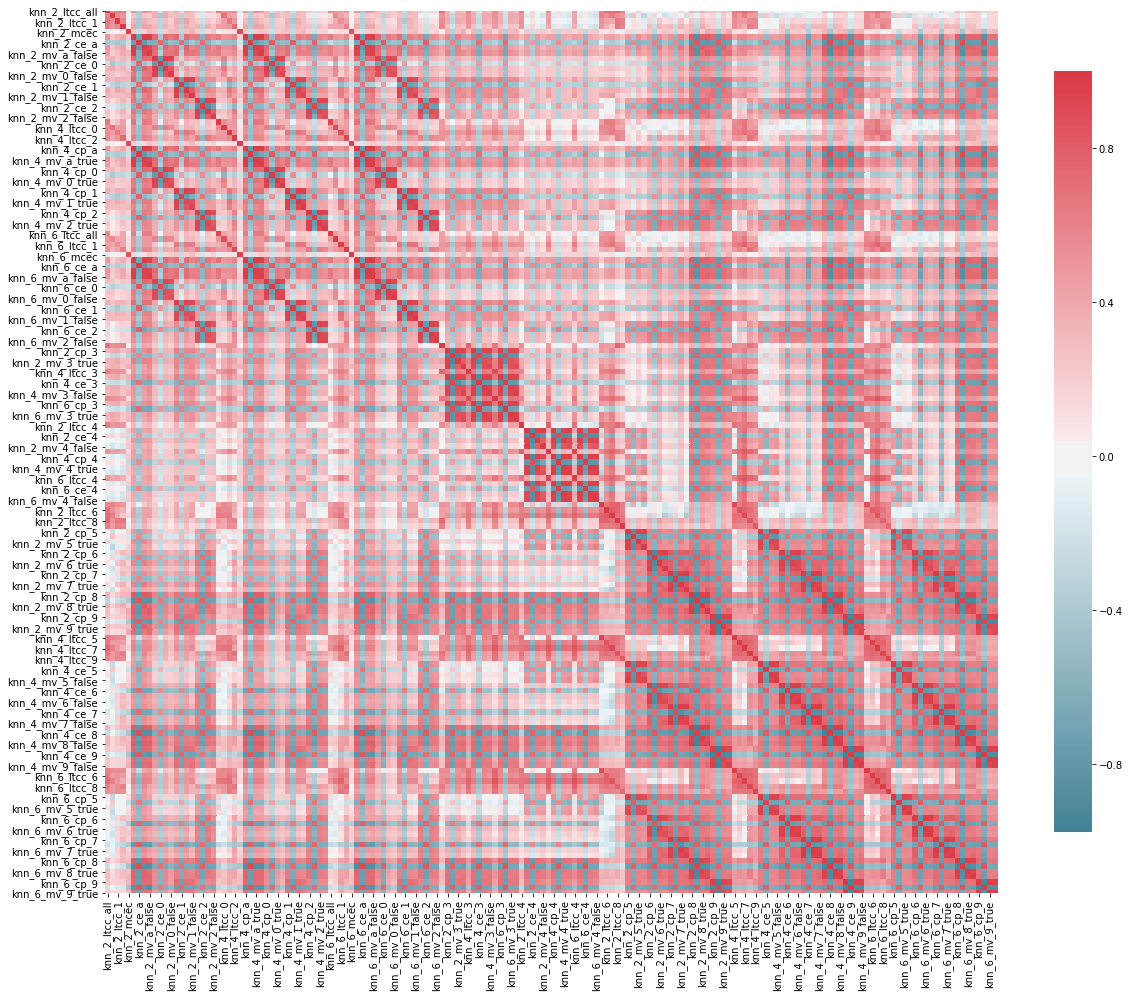

In [6]:

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True,  cbar_kws={"shrink": .7})

In [7]:
pca = PCA()
nn = pca.fit_transform(df.iloc[:, 1:-1].dropna(axis=1))




kmeans = KMeans(n_clusters=10, random_state=0).fit(df.iloc[:, 1:-1].dropna(axis=1))
print(kmeans)

#df['pca1'] = nn[:,0]
#df['pca1'] = nn[:,1]

df.head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


,index,knn_2_ltcc_all,knn_2_ltcc_0,knn_2_ltcc_1,knn_2_ltcc_2,knn_2_mcec,knn_2_cp_a,knn_2_ce_a,knn_2_mv_a_true,knn_2_mv_a_false,...,knn_6_mv_7_false,knn_6_cp_8,knn_6_ce_8,knn_6_mv_8_true,knn_6_mv_8_false,knn_6_cp_9,knn_6_ce_9,knn_6_mv_9_true,knn_6_mv_9_false,name
12697,JavierGeneratedData_3dinterleaved_3classes_X-Y,0.105603,0.308824,0.276596,0.262032,1.0,0.905172,0.081163,0.859914,0.950431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
12711,JavierGeneratedData_3dinterleaved_3classes_X-Z,0.151188,0.389706,0.372340,0.230216,1.0,0.893089,0.091349,0.842333,0.943844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
12726,JavierGeneratedData_3dinterleaved_3classes_Y-Z,0.350318,0.859375,0.148936,0.246377,1.0,0.891720,0.095948,0.834395,0.949045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
11210,JavierGeneratedData_3dinterleaved_3classes_iso1-X,0.165584,0.228346,0.439655,0.446154,1.0,0.995130,0.003762,0.993506,0.996753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
11231,JavierGeneratedData_3dinterleaved_3classes_iso1-Y,0.137546,0.274074,0.220779,0.175439,1.0,0.886617,0.109845,0.810409,0.962825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes


In [8]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

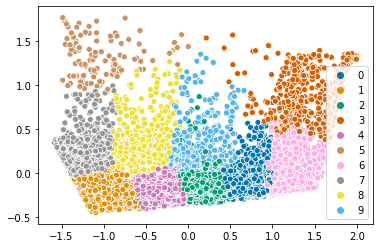

In [9]:
sns.scatterplot(nn[:,0],nn[:,1],hue=kmeans.labels_, palette= sns.color_palette('colorblind') )

In [10]:
# 5 annotations

total_euros = 200
cost_per_task = .1
exps = 2
annotations=5
scatterplots = 50

print((total_euros/cost_per_task)/(exps*annotations))
print(cost_per_task*exps*annotations*scatterplots)


200.0
50.0


In [11]:
df['kmeans'] = kmeans.labels_

In [12]:
df.iloc[:, 1:-1].dropna(axis=1)

,knn_2_ltcc_all,knn_2_mcec,knn_2_cp_a,knn_2_ce_a,knn_2_mv_a_true,knn_2_mv_a_false,knn_4_ltcc_all,knn_4_mcec,knn_4_cp_a,knn_4_ce_a,knn_4_mv_a_true,knn_4_mv_a_false,knn_6_ltcc_all,knn_6_mcec,knn_6_cp_a,knn_6_ce_a,knn_6_mv_a_true,knn_6_mv_a_false,name
12697,0.105603,1.0,0.905172,0.081163,0.859914,0.950431,0.403017,1.0,0.900862,0.116077,0.883621,0.946121,0.403017,1.0,0.895115,0.131570,0.881466,0.954741,JavierGeneratedData_3dinterleaved_3classes
12711,0.151188,1.0,0.893089,0.091349,0.842333,0.943844,0.403888,1.0,0.894168,0.113377,0.872570,0.935205,0.403888,1.0,0.892729,0.124963,0.872570,0.933045,JavierGeneratedData_3dinterleaved_3classes
12726,0.350318,1.0,0.891720,0.095948,0.834395,0.949045,0.405520,1.0,0.898089,0.121122,0.883227,0.949045,0.405520,1.0,0.892781,0.131661,0.883227,0.944798,JavierGeneratedData_3dinterleaved_3classes
11210,0.165584,1.0,0.995130,0.003762,0.993506,0.996753,0.376623,1.0,0.993506,0.007394,0.996753,0.996753,0.412338,1.0,0.984307,0.025809,0.996753,0.996753,JavierGeneratedData_3dinterleaved_3classes
11231,0.137546,1.0,0.886617,0.109845,0.810409,0.962825,0.460967,1.0,0.841078,0.188370,0.799257,0.929368,0.501859,1.0,0.812887,0.233509,0.765799,0.907063,JavierGeneratedData_3dinterleaved_3classes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12953,0.016997,1.0,0.362134,0.280215,0.165250,0.559018,0.067989,1.0,0.366856,0.365033,0.371105,0.508971,0.219075,1.0,0.362764,0.416356,0.397545,0.522191,yeast
12983,0.008556,1.0,0.346524,0.292967,0.152941,0.540107,0.017112,1.0,0.322193,0.394254,0.295187,0.433155,0.050267,1.0,0.318895,0.444475,0.304813,0.448128,yeast
12995,0.023013,1.0,0.397490,0.262751,0.186192,0.608787,0.135983,1.0,0.398536,0.332649,0.353556,0.514644,0.332636,1.0,0.404463,0.370834,0.410042,0.535565,yeast
12810,0.010336,1.0,0.317399,0.303463,0.136090,0.498708,0.031869,1.0,0.310508,0.403185,0.279070,0.422911,0.064599,1.0,0.307350,0.458687,0.298880,0.420327,yeast


In [13]:
from sklearn.model_selection import train_test_split
import os
os.getcwd()

X_train, X_test, y_train, y_test =  train_test_split(pd.DataFrame(nn), pd.Series(kmeans.labels_), test_size=70)

In [75]:
def sample_data(df, y_col, amount, save=False):
    X_train, X_test, y_train, y_test =  train_test_split(df, y_col, test_size=amount, random_state=21)
    return y_train.index      

In [ ]:
def create_sample_from_index(df, index, fig_folder = '../../data/orig_data/figures/enhanced_dim_data/', ):
    ddf = df[index].copy()
    
    pngs = [row + '.png' for i, row in df.loc[index,'index'].items()]

    for png in pngs:
        if os.path.exists(fig_folder+png):
            os.replace(folder+png, fig_folder+'sample/'+png)
    

In [17]:
csvs = [row + '.csv' for i, row in df.loc[idx,'index'].items()]

folder='/Users/morarica/Developer/SepMe/data/orig_data/input_data/enhanced_dim_data/'


for csv in csvs:
    if os.path.exists(folder+csv):
        os.replace(folder+csv, folder+'sample/'+csv)

In [18]:
files = os.listdir(folder+'sample/')

tuples = []

for file in files:
    df = pd.read_csv(folder+'sample/' + file)
    tuples.append(['https://scatterplots.s3.eu-central-1.amazonaws.com/' + file, int(len(set(df['class'])))])
    
tuples = np.array(tuples)

ddf = pd.DataFrame({'image_url': tuples[:,0], 'i':  tuples[:,1]})
ddf = ddf.loc[ddf['i'].astype(int)>2,:].reset_index()
print(ddf.shape)
ddf.to_csv('small_experiment.csv', index=False)

(112, 3)


In [29]:
ddf.dtypes

index         int64
image_url    object
i            object
dtype: object

,index,M,A,class,dim_x,dim_y,fileName,MA
0,JavierGeneratedData_3dinterleaved_3classes_PCA_1,4,5,1,1,2,JavierGeneratedData_3dinterleaved_3classes_PCA,4.5
1,JavierGeneratedData_3dinterleaved_3classes_PCA_2,4,5,2,1,2,JavierGeneratedData_3dinterleaved_3classes_PCA,4.5
2,JavierGeneratedData_3dinterleaved_3classes_PCA_3,4,5,3,1,2,JavierGeneratedData_3dinterleaved_3classes_PCA,4.5
3,JavierGeneratedData_3dinterleaved_3classes_Rob...,4,5,1,1,2,JavierGeneratedData_3dinterleaved_3classes_RobPCA,4.5
4,JavierGeneratedData_3dinterleaved_3classes_Rob...,4,5,2,1,2,JavierGeneratedData_3dinterleaved_3classes_RobPCA,4.5


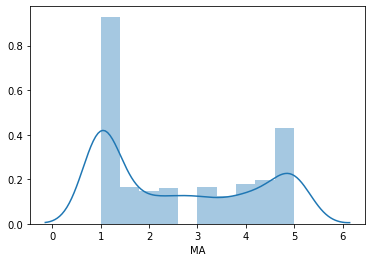

In [60]:
df_human = pd.read_csv('../../data/orig_data/human_reduced_results.csv')
df_human['MA'] = (df_human['M']+df_human['A'])/2
sns.distplot(df_human['MA'], bins=10)
df_human.head()

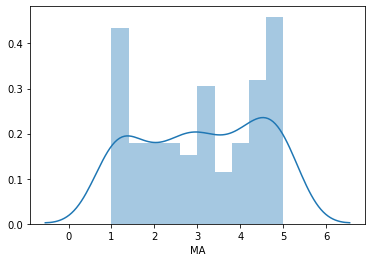

In [71]:
dfh = df_human.groupby('fileName').agg({'class': 'max', 'MA': 'mean'}).reset_index().sort_values(['class'])
dfh = dfh.loc[dfh['class']>2,:]
sns.distplot(dfh['MA'], bins=10)
dfh.reset_index(drop=True, inplace=True)

In [74]:
sample_data(dfh, dfh.MA, 50)

Int64Index([182, 103, 129,  41, 189, 114,  87, 121, 139, 124,
            ...
             43,  40, 107,  76,  49, 138,  12,  86, 175, 166],
           dtype='int64', length=146)